#Tokenization using Spacy


In [11]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [12]:
text = "Mobile phone is good but the camera is not."

In [13]:
doc = nlp(text)

In [14]:
for i in doc:
  print(i)

Mobile
phone
is
good
but
the
camera
is
not
.


#Stop Words Removal

In [15]:
from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
len(STOP_WORDS)

326

In [17]:
print(STOP_WORDS)

{'around', 'but', 'except', "'s", 'whereafter', 'less', 'ours', 'put', 'often', 'his', 'alone', 'namely', 'it', 'one', 'moreover', 'has', 'further', 'become', 'bottom', 'or', 'least', 'ever', 'was', 'therein', 'that', 'there', 'would', 'themselves', 'sometime', 'nobody', 'he', 'where', 'move', 'above', 'two', 'this', 'please', '‘ve', 'few', 'might', 'their', 'otherwise', 'so', 'whenever', '’ve', 'almost', 'became', 'itself', 'never', 'last', 'cannot', 'what', 'from', 'forty', 'hereafter', 'unless', 'behind', 'together', 'whereupon', 'same', 'either', 'own', 'latter', 'formerly', 'for', 'fifteen', 'former', 'into', 'even', 'during', 'also', "'re", 'really', 'himself', 'than', 'well', 'before', 'more', 'must', 'full', 'her', 'a', 'whither', 'say', 'however', 'again', 'beforehand', 'is', 'hereby', 'through', 'being', 'ten', 'whom', 'rather', 'such', 'per', 'quite', 'here', 'though', 'she', 'call', 'serious', 'indeed', 'at', 'off', "'d", 'both', 'seems', 'four', 'keep', 'can', 'seemed', 't

In [18]:
for i in doc:
  if i.is_stop !=True and i.is_punct != True:
    print(i)

Mobile
phone
good
camera


#Vectorization

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer()

In [21]:
sample_text = ['Julie loves John more than Linda loves John','Jane loves John more than Julie loves John']

In [22]:
vectorizer.fit(sample_text)

CountVectorizer()

In [23]:
print(vectorizer.vocabulary_)

{'julie': 2, 'loves': 4, 'john': 1, 'more': 5, 'than': 6, 'linda': 3, 'jane': 0}


In [24]:
vector = vectorizer.transform(['Julie loves John more than Linda loves John'])

In [25]:
print(vector)

  (0, 1)	2
  (0, 2)	1
  (0, 3)	1
  (0, 4)	2
  (0, 5)	1
  (0, 6)	1


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfvectorizer = TfidfVectorizer()

In [28]:
tfvectorizer.fit(sample_text)

TfidfVectorizer()

In [29]:
tfvectorizer.vocabulary_

{'julie': 2,
 'loves': 4,
 'john': 1,
 'more': 5,
 'than': 6,
 'linda': 3,
 'jane': 0}

In [30]:
vector1 = tfvectorizer.transform(['Julie loves John more than Linda loves John'])

In [31]:
print(vector1)

  (0, 6)	0.2776136126156931
  (0, 5)	0.2776136126156931
  (0, 4)	0.5552272252313862
  (0, 3)	0.39017624606721324
  (0, 2)	0.2776136126156931
  (0, 1)	0.5552272252313862


In [32]:
print(vector)

  (0, 1)	2
  (0, 2)	1
  (0, 3)	1
  (0, 4)	2
  (0, 5)	1
  (0, 6)	1


## Topic Modeling Using LDA

In [37]:
import spacy
nlp = spacy.load('en_core_web_sm')

import gensim

import pandas as pd
from gensim import corpora

import re

C:\Users\Shreyas M P\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [38]:
nlp.vocab['star'].is_stop = True
nlp.vocab['stars'].is_stop = True
nlp.vocab['good'].is_stop = True

In [39]:
#pandas
reviews = pd.read_csv('Flipkart_ratings.csv')

In [40]:
#pandas
reviews['star_rating'] = reviews['star_rating'].apply(lambda x:1 if x > 4 else 0)

In [41]:
#pandas
negative_sentiments = reviews[reviews['star_rating'] == 0]
print(negative_sentiments.shape[0])

2082


In [42]:
#pandas
negative_sentiments['Final review'] = negative_sentiments['review_headline'] + ' ' + negative_sentiments['review_body']
negative_sentiments['Final review'] = negative_sentiments['Final review'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-42-0738162f2a71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentiments['Final review'] = negative_sentiments['review_headline'] + ' ' + negative_sentiments['review_body']
<ipython-input-42-0738162f2a71>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  negative_sentiments['Final review'] = negative_sentiments['Final review'].str.replace("[^a-zA-Z#]", " ")
<ipython-input-42-0738162f2a71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [43]:
#pandas
negative_sentiments = negative_sentiments.dropna()

In [44]:
#tokenization, stop words removal
negative_sentiments['Final Text'] = ''
for i in range(negative_sentiments.shape[0]):
    temp = []
    document = nlp(negative_sentiments['Final review'].iloc[i].lower())
    for j in document:
        if j.is_stop!=True and j.is_punct!=True:
            temp.append(j.lemma_)
    negative_sentiments['Final Text'].iloc[i] = temp


C:\Users\Shreyas M P\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
#vectoriazation and topic modeling 
def topic_modelling(text):
    dictionary = corpora.Dictionary(text)
    doc_term_matrix = [dictionary.doc2bow(rev) for rev in text]
    LDA = gensim.models.ldamodel.LdaModel
    lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, 
                    num_topics = 1, random_state = 19, passes = 50)
    temp = re.findall('[a-z]*',lda_model.print_topics()[0][1])
    tags = [x for x in temp if x]
    return tags

In [46]:
#pandas
negative_sentiments['Final Text'] = negative_sentiments['Final Text'].apply(lambda x:' '.join(x))
negative_sentiments.head()

,marketplace,customer_id,review_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Final review,Final Text
0,US,41099022,R59VGL4HIPFDP,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,1,N,Y,One Star,garbage,31-08-2015,One Star garbage,garbage
1,US,15744366,R3GR0Z9Z4Z1295,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,N,Doesn't work as advertised,"Didn't work as advertised, there was no sound ...",31-08-2015,Doesn t work as advertised Didn t work as adve...,doesn t work advertised didn t work advertise ...
2,US,46165193,R8R09HXXQHIWN,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,Y,One Star,Setup way to complicated for the average user.,30-08-2015,One Star Setup way to complicated for the aver...,setup way complicate average user
4,US,52865176,R2SCARC7V2J64P,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,N,Saved Grandma but camera died after 2 yrs,Worked for 2 yrs as a 'granny cam' and saved h...,29-08-2015,Saved Grandma but camera died after yrs Work...,save grandma camera die yr work yrs gr...
5,US,3282316,R10WZ8I85SRCMK,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,Y,get what you pay for,"I bought this with reading all these reviews,I...",28-08-2015,get what you pay for I bought this with readin...,pay buy read review want mainly dog day securi...


In [48]:
#pandas
negative_sentiments['Review Tags'] = negative_sentiments['Final Text'].apply(lambda x: topic_modelling([x.split(' ')]))
negative_sentiments.head()

,marketplace,customer_id,review_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Final review,Final Text,Review Tags
0,US,41099022,R59VGL4HIPFDP,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,1,N,Y,One Star,garbage,31-08-2015,One Star garbage,garbage,[garbage]
1,US,15744366,R3GR0Z9Z4Z1295,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,N,Doesn't work as advertised,"Didn't work as advertised, there was no sound ...",31-08-2015,Doesn t work as advertised Didn t work as adve...,doesn t work advertised didn t work advertise ...,"[t, work, return, sound, record, refund, adver..."
2,US,46165193,R8R09HXXQHIWN,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,Y,One Star,Setup way to complicated for the average user.,30-08-2015,One Star Setup way to complicated for the aver...,setup way complicate average user,"[average, complicate, setup, user, way]"
4,US,52865176,R2SCARC7V2J64P,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,N,Saved Grandma but camera died after 2 yrs,Worked for 2 yrs as a 'granny cam' and saved h...,29-08-2015,Saved Grandma but camera died after yrs Work...,save grandma camera die yr work yrs gr...,"[camera, yrs, yr, save, die, reasonable, provi..."
5,US,3282316,R10WZ8I85SRCMK,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,Y,get what you pay for,"I bought this with reading all these reviews,I...",28-08-2015,get what you pay for I bought this with readin...,pay buy read review want mainly dog day securi...,"[review, wonder, wifi, want, t, stop, show, se..."


In [49]:
from functools import reduce

final_list = reduce(lambda x,y :x+y ,negative_sentiments['Review Tags'].dropna().values.tolist())
final_list

['garbage',
 't',
 'work',
 'return',
 'sound',
 'record',
 'refund',
 'advertised',
 'didn',
 'advertise',
 'average',
 'complicate',
 'setup',
 'user',
 'way',
 'camera',
 'yrs',
 'yr',
 'save',
 'die',
 'reasonable',
 'provide',
 'robust',
 'remotely',
 'review',
 'wonder',
 'wifi',
 'want',
 't',
 'stop',
 'show',
 'set',
 'security',
 'money',
 'waste',
 'unreliable',
 'unbelievably',
 'totally',
 's',
 'impossible',
 'consistently',
 'completely',
 'ac',
 'adapter',
 'die',
 'year',
 'work',
 'night',
 'kid',
 'monitor',
 'wake',
 'click',
 'ok',
 'aware',
 'loudly',
 'set',
 'hour',
 'device',
 'attempt',
 'want',
 'silly',
 'setup',
 'simple',
 'spend',
 'remote',
 'br',
 'model',
 't',
 'buy',
 'new',
 'lack',
 'hour',
 'purchase',
 'price',
 'work',
 'connect',
 'didn',
 'forget',
 'send',
 't',
 'camera',
 'long',
 'work',
 'foscams',
 'set',
 'great',
 't',
 'don',
 'die',
 'set',
 'pain',
 'link',
 'd',
 'camera',
 'product',
 'return',
 'plug',
 'require',
 'camera',
 'li

In [50]:
dic = {}
for i in final_list:
    if i not in dic.keys():
        dic[i] = 1
    else:
        dic[i] = dic[i] + 1

In [51]:
#pandas
df = pd.Series(dic)
df = df.drop(['t','s','br'])
df = df.sort_values(ascending = False)
df.head(20)

camera      1003
work         643
set          486
support      298
great        266
foscam       266
setup        230
product      186
use          180
time         168
quality      158
tech         148
try          144
software     138
router       138
wireless     136
buy          130
price        129
return       124
service      120
dtype: int64

In [52]:
#data visualization, matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


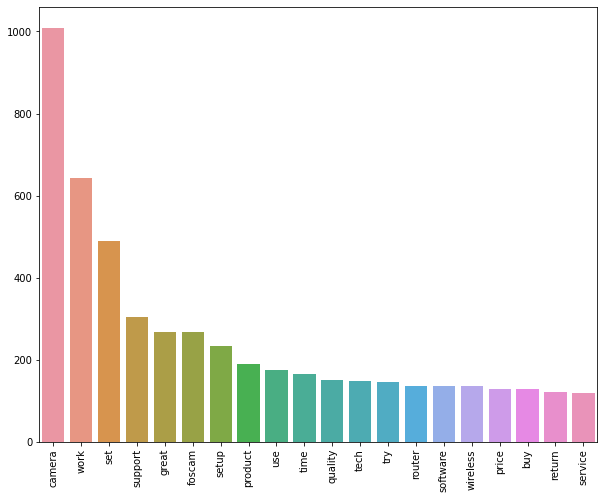

In [ ]:
#data visualization, matplotlib & seaborn
fig = plt.figure(figsize = (10,8))
sns.barplot(df.head(20).index.values.tolist(), df.head(20).values.tolist())
plt.xticks(rotation = 90)
plt.show()

In [ ]:
negative_sentiments = negative_sentiments[['star_rating','review_headline','review_body']]
negative_sentiments.head()

,star_rating,review_headline,review_body
0,0,Four Stars,Very good quality. So far so good.
3,0,they work,They charge my wife's phone
6,0,One Star,It broke less than a month. Don't buy them.
9,0,Had this for almost three months and it starte...,Had this for almost three months and it starte...
15,0,Three Stars,"Quality is ok, but the cables tend to fray aro..."


In [ ]:
import warnings
warnings.filterwarnings("ignore")


import spacy
nlp = spacy.load('en_core_web_sm')


import gensim

import pandas as pd
from gensim import corpora

import re